# Методы метрической классификации

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
cmaps = ['Accent','Accent_r','Blues','Blues_r','BrBG','BrBG_r','BuGn','BuGn_r',' BuPu','BuPu_r','CMRmap','CMRmap_r','Dark2','Dark2_r','GnBu','GnBu_r','Greens','Greens_r','Greys','Greys_r','OrRd',' OrRd_r','Oranges','Oranges_r','PRGn','PRGn_r','Paired','Paired_r','Pastel1',' Pastel1_r','Pastel2','Pastel2_r','PiYG','PiYG_r','PuBu','PuBuGn','PuBuGn_r',' PuBu_r','PuOr','PuOr_r','PuRd','PuRd_r','Purples','Purples_r','RdBu','RdBu_r',' RdGy','RdGy_r','RdPu','RdPu_r','RdYlBu','RdYlBu_r','RdYlGn','RdYlGn_r','Reds',' Reds_r','Set1','Set1_r','Set2','Set2_r','Set3','Set3_r','Spectral','Spectral_r',' Wistia','Wistia_r','YlGn','YlGnBu','YlGnBu_r','YlGn_r','YlOrBr','YlOrBr_r','YlOrRd',' YlOrRd_r','afmhot','afmhot_r','autumn','autumn_r','binary','binary_r','bone',' bone_r','brg','brg_r','bwr','bwr_r','cividis','cividis_r','cool','cool_r','coolwarm','coolwarm_r','copper','copper_r',' cubehelix','cubehelix_r','flag','flag_r','gist_earth','gist_earth_r','gist_gray','gist_gray_r','gist_heat','gist_heat_r','gist_ncar','gist_ncar_r',' gist_rainbow','gist_rainbow_r','gist_stern','gist_stern_r','gist_yarg',' gist_yarg_r','gnuplot','gnuplot2','gnuplot2_r','gnuplot_r','gray','gray_r',' hot','hot_r','hsv','hsv_r','icefire','icefire_r','inferno',' inferno_r','magma','magma_r','mako','mako_r',' nipy_spectral','nipy_spectral_r','ocean','ocean_r','pink','pink_r',' plasma','plasma_r','prism','prism_r','rainbow','rainbow_r',' rocket','rocket_r','seismic','seismic_r','spring','spring_r',' summer','summer_r','tab10','tab10_r','tab20','tab20_r','tab20b',' tab20b_r','tab20c','tab20c_r','terrain','terrain_r','twilight',' twilight_r','twilight_shifted','twilight_shifted_r','viridis','viridis_r','vlag','vlag_r','winter','winter_r']

### Загрузите данные о диагностике сахарного диабета

In [ ]:
diabets = pd.read_csv('/content/drive/MyDrive/Учёба/data/diabetes.csv')
diabets.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1. `Pregnancies`: 
>Number of times pregnant | Количество беременностей
2. `Glucose`: 
>Plasma glucose concentration a 2 hours in an oral glucose tolerance test | Концентрация глюкозы в плазме крови через 2 часа при пероральном тесте на толерантность к глюкозе.
3. `BloodPressure`:
>Diastolic blood pressure (mm Hg) | Диастолическое кровяное давление (мм рт. ст.)
4. `SkinThickness`: 
>Triceps skin fold thickness (mm) | Толщина кожной складки трицепса (мм)
5. `Insulin`: 
>2-Hour serum insulin (mu U/ml) | 2-часовой сывороточный инсулин (ме Ед/мл)
6. `BMI`: 
>Body mass index (weight in kg/(height in m)^2) | Индекс массы тела (вес в кг/(рост в м)^2)
7. `DiabetesPedigreeFunction`: 
>Diabetes pedigree function | Функция родословной диабета
8. `Age`: 
>Age (years) | Возраст (годы)
9. `Outcome` -  **Целевая Функция**: 
>Class variable (0 or 1) 268 of 768 are 1, the others are 0 | Переменная класса (0 или 1) 268 из 768 равны 1, остальные равны 0

### Разделите эти данные на тестовую и обучающую выборки

In [ ]:
X = diabets.drop(['Outcome'], axis=1)

In [ ]:
Y = diabets.Outcome

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

Здесь мы создаем объект классификатора, используя конструктор по умолчанию.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

Обучим наш классификатор на обучающей выборке:

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Для оценки эффективности полученной модели сделаем предсказания по нашему классификатору на тестовой выборке (там, где мы уже знаем правильные ответы, чтобы сравнить, насколько предсказания расходятся с действительностью):

In [ ]:
Y_pred = model.predict(X_test)

Оценим эффективность предсказания тестовой выборки при помощи матрицы классификации:

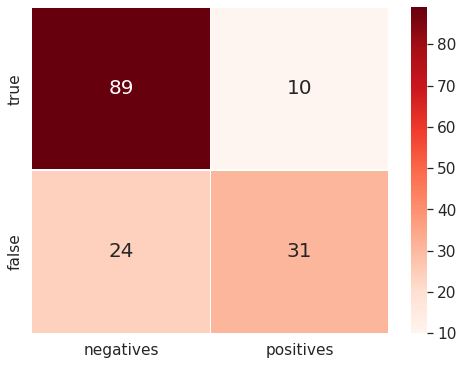

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
cm = metrics.confusion_matrix(Y_test, Y_pred)

sns.heatmap(cm, linewidths=.5, annot=True, annot_kws={'fontsize':20},cmap=np.random.choice(cmaps),
            xticklabels=['negatives','positives'],
            yticklabels=['true','false'])

Матрица классификации показывает нам очень полезную информацию: совместное распределение числа объектов предсказанных и реальных классов. Рассматривая эту матрицу мы можем получить важную информацию: сколько объектов мы классифицировали правильно, сколько неверно, к каким классам наша модель тяготеет, какие классы распознаются хорошо, какие - плохо

Кроме матрицы классификации весьма полезно использовать численные метрики эффективности классификации. Существует большое количество таких метрик, в данной работе мы сосредоточимся на трех основных.

https://pythonru.com/baza-znanij/metriki-accuracy-precision-i-recall#Accuracy-Precision-и-Recall

**Метрика Accuracy** (метрика достоверности предсказания):
>Accuracy — это показатель, который описывает общую точность предсказания модели по всем классам. Это особенно полезно, когда каждый класс одинаково важен. Он рассчитывается как отношение количества правильных прогнозов к их общему количеству.

In [ ]:
metrics.accuracy_score(Y_test, Y_pred)

0.7792207792207793

**Метрика Precision** (метрика точности)
>Precision представляет собой отношение числа семплов, верно классифицированных как Positive, к общему числу выборок с меткой Positive (распознанных правильно и неправильно). Precision измеряет точность модели при определении класса Positive, иными словами помогает узнать, насколько точна модель, когда она говорит, что семпл имеет класс Positive

In [ ]:
metrics.precision_score(Y_test, Y_pred)

0.7560975609756098

**Метрика Recall** (метрика полноты)
>Recall рассчитывается как отношение числа Positive выборок, корректно классифицированных как Positive, к общему количеству Positive семплов. Чем выше recall, тем больше Positive семплов было найдено. Precision учитывает классификацию как Positive, так и Negative семплов. Recall же использует при расчете только представителей класса Positive.

In [ ]:
metrics.recall_score(Y_test, Y_pred)

0.5636363636363636

In [ ]:
model_info = [metrics.accuracy_score(Y_test, Y_pred), 
               metrics.precision_score(Y_test, Y_pred), 
               metrics.recall_score(Y_test, Y_pred)]

## Дополнительные задания

1. Используйте метод опорных векторов для построения альтернативной модели предсказания диабета.
2. Сравните метрики эффективности и сделайте вывод о том, какая модель лучше предсказывает заболевание.
4. Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;
5. Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.
6. Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris().

**Метод Опорных Векторов** или **SVM** (от англ. Support Vector Machines) — это линейный алгоритм используемый в задачах классификации и регрессии. 

In [ ]:
from sklearn import svm
model = svm.SVC(kernel='poly')
model.fit(X_train, Y_train)

SVC(kernel='poly')

In [ ]:
Y_pred_alt = model.predict(X_test)

In [ ]:
svm_model_info = [metrics.accuracy_score(Y_test, Y_pred_alt), 
                  metrics.precision_score(Y_test, Y_pred_alt), 
                  metrics.recall_score(Y_test, Y_pred_alt)]

In [ ]:
comaprison =  pd.DataFrame([model_info,svm_model_info],
                           columns=['Метрика достоверности предсказания',
                                    'Метрика точности',
                                    'Метрика полноты'],
                           index=['Default','SVM'])

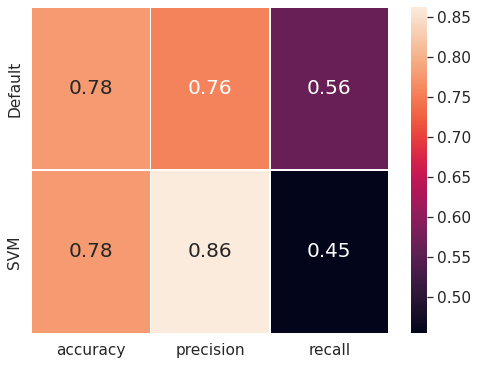

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
cm = metrics.confusion_matrix(Y_test, Y_pred)

sns.heatmap(comaprison, linewidths=.5, annot=True, annot_kws={'fontsize':20},
            xticklabels=['accuracy','precision','recall'])

3. Постройте модели классификации на основе следующих методов:
* логистическая регрессия (LogisticRegression);
* метод опорных векторов с линейным ядром (SVC);
* метод опорных векторов с гауссовым ядром (SVC);
* метод k ближайших соседей (KNeighborsClassifier);
* многослойный перцептрон (MLP);
* другие методы по желанию;

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

### Посмотрим на метрики методов

In [ ]:
methods = {'logistic regression': LogisticRegression(),
           'svc: linear kernel': svm.SVC(kernel='poly'),
           'svc: gauss kernel': svm.SVC(kernel='rbf'),
           'k neighbours': KNeighborsClassifier(),
           'mlp': MLPClassifier()}

In [ ]:
def classifier(method):
  model = methods[method]
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  methods_score[str(method)] = [metrics.accuracy_score(Y_test, Y_pred), 
                                metrics.precision_score(Y_test, Y_pred), 
                                metrics.recall_score(Y_test, Y_pred)]

In [ ]:
methods_score = dict()
for method_name in methods.keys():
  classifier(method_name)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
methods_score = pd.DataFrame(methods_score.values(),
                             columns = ['accuracy','precision','recall'],
                             index = methods_score.keys())

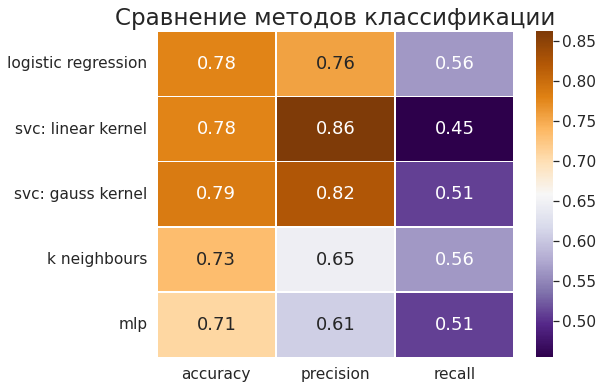

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
plt.title('Сравнение методов классификации', fontsize = 23)


sns.heatmap(methods_score, linewidths=.5, annot=True, annot_kws={'fontsize':18}, cmap=cmaps[39])

* Наилучшим показателем достоверности предсказания обладает модель, построенная с помощью `метода опорных векторов с гауссовым ядром`
* Наилучшим показателем точности обладает модель, построенная с помощью `метода опорных векторов с линейным ядром`
* Наилучшим показателем полноты обладает модель, построенная с помощью `логистической регрессии` и `метода k ближайших соседей`

Модель с лучшими показателями эффективности построена с помощью `метода опорных векторов с гауссовым ядром`. Почти такую же эффективность даёт и `логистическая регрессия` 

### Подберём наиболее подходящие параметры для метода ближйшего соседа

In [ ]:
knc_methods = {'k=3': KNeighborsClassifier(n_neighbors=3),
               'k=5': KNeighborsClassifier(n_neighbors=5),
               'k=6': KNeighborsClassifier(n_neighbors=6),
               'k=9': KNeighborsClassifier(n_neighbors=7),
               'k=15': KNeighborsClassifier(n_neighbors=9)}

In [ ]:
def knc(method):
  model = knc_methods[method]
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  knc_methods_score[str(method)] = [metrics.accuracy_score(Y_test, Y_pred), 
                                    metrics.precision_score(Y_test, Y_pred), 
                                    metrics.recall_score(Y_test, Y_pred)]

In [ ]:
knc_methods_score = dict()
for method_name in knc_methods.keys():
  knc(method_name)

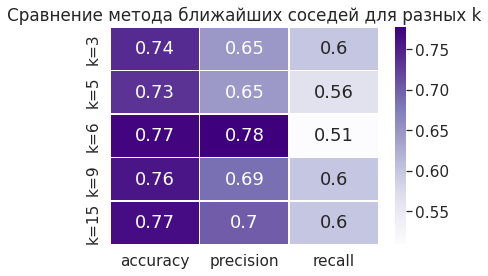

In [ ]:
knc_methods_score_df = pd.DataFrame(knc_methods_score.values(),
                             columns = ['accuracy','precision','recall'],
                             index = knc_methods_score.keys())

fig = plt.figure(figsize=(6,4))
sns.set(font_scale=1.4)
plt.title('Сравнение метода ближайших соседей для разных k')


sns.heatmap(knc_methods_score_df, linewidths=.5, annot=True, annot_kws={'fontsize':18}, cmap=cmaps[42])

```
knc_methods = {'k=3': KNeighborsClassifier(n_neighbors=3),
               'k=5': KNeighborsClassifier(n_neighbors=5),
               'k=6': KNeighborsClassifier(n_neighbors=6)}

fig, ax = plt.subplots(1,3, figsize=(28,5))
plt.suptitle('Learning Curves for Different K in KNeighborsClassifier', y=1.05)
plt.subplots_adjust(wspace=0.3)
for i, method in enumerate(knc_methods):
  learning_curve_plot_k(i, method)
plt.legend(['Training score', 'Cross-validation score'],loc='lower center',bbox_to_anchor=(-1, -0.5))
plt.show()
```



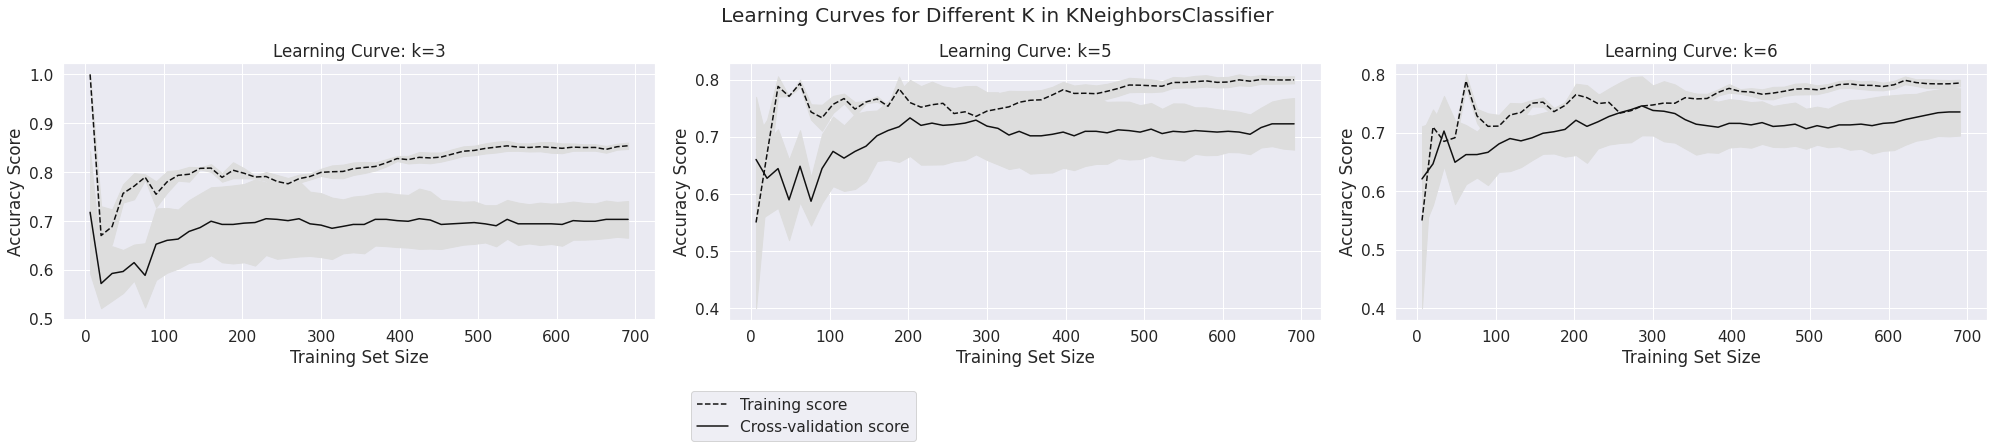

### Подберём наиболее подходящие параметры для метода многослойного перцептрона

In [ ]:
mlp_methods = {'lbfgs': MLPClassifier(solver='lbfgs'),
               'sgd': MLPClassifier(solver='sgd'),
               'adam': MLPClassifier(solver='adam')}

In [ ]:
def mlp(method):
  model = mlp_methods[method]
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  mlp_methods_score[str(method)] = [metrics.accuracy_score(Y_test, Y_pred), 
                                    metrics.precision_score(Y_test, Y_pred), 
                                    metrics.recall_score(Y_test, Y_pred)]

In [ ]:
mlp_methods_score = dict()
for method_name in mlp_methods.keys():
  mlp(method_name)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
mlp_methods_score_df = pd.DataFrame(mlp_methods_score.values(),
                                    columns = ['accuracy','precision','recall'],
                                    index = mlp_methods_score.keys())

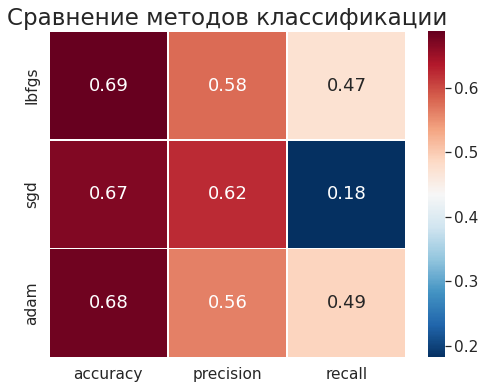

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
plt.title('Сравнение методов классификации', fontsize = 23)


sns.heatmap(mlp_methods_score_df, linewidths=.5, annot=True, annot_kws={'fontsize':18}, cmap=cmaps[45])

```
fig, ax = plt.subplots(1,3, figsize=(28,5))
plt.suptitle('Learning Curves for Different Solvers in MLPClassifier', y=1.05)
plt.subplots_adjust(wspace=0.3)
for i, method in enumerate(mlp_methods):
  learning_curve_plot_m(i, method)
plt.legend(['Training score', 'Cross-validation score'],loc='lower center',bbox_to_anchor=(-0.5, -0.5))
plt.show()
```

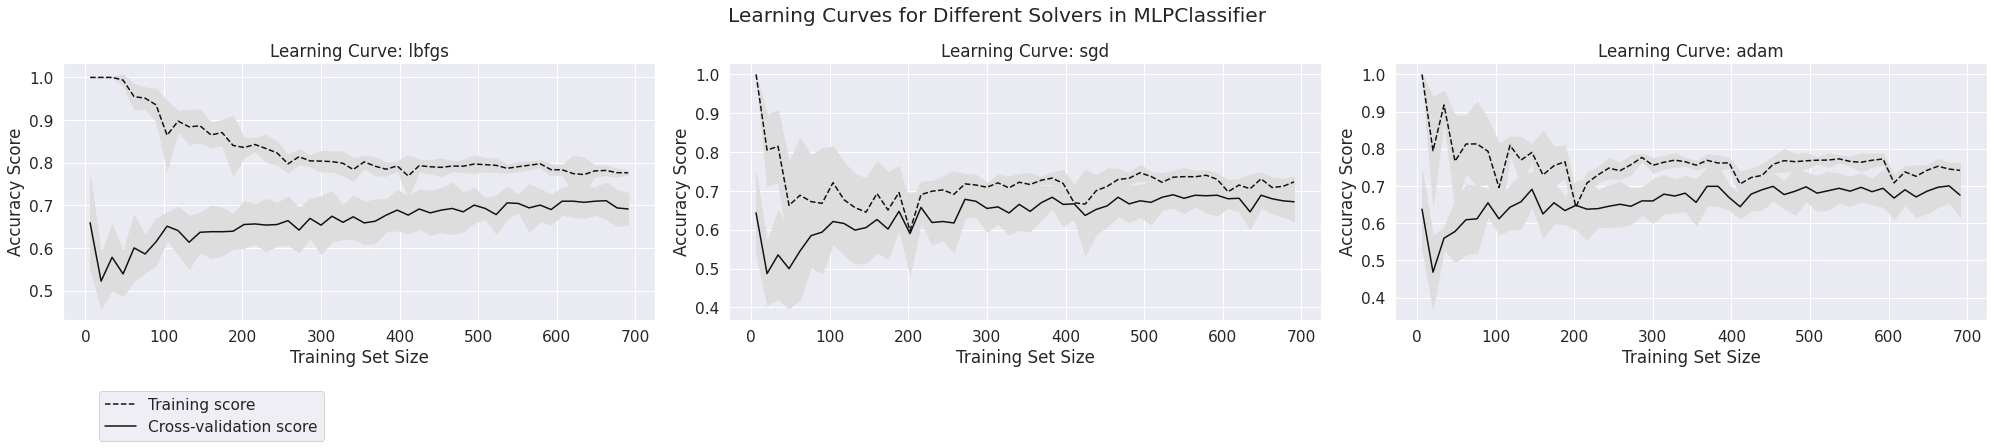

### Посмотрим на метрики методов с обновленными параметрами 

In [ ]:
methods = {'logistic regression': LogisticRegression(),
           'svc: linear kernel': svm.SVC(kernel='poly') ,
           'svc: gauss kernel': svm.SVC(kernel='rbf') ,
           'k neighbours': KNeighborsClassifier(n_neighbors=6),
           'mlp': MLPClassifier(solver='sgd')
           }

In [ ]:
def classifier(method):
  model = methods[method]
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  methods_score[str(method)] = [metrics.accuracy_score(Y_test, Y_pred), 
                                metrics.precision_score(Y_test, Y_pred), 
                                metrics.recall_score(Y_test, Y_pred)]

In [ ]:
methods_score = dict()
for method_name in methods.keys():
  classifier(method_name)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
methods_score = pd.DataFrame(methods_score.values(),
                             columns = ['accuracy','precision','recall'],
                             index = methods_score.keys())

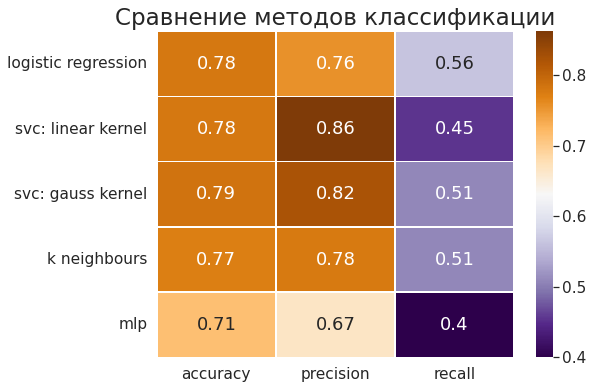

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
plt.title('Сравнение методов классификации', fontsize = 23)


sns.heatmap(methods_score, linewidths=.5, annot=True, annot_kws={'fontsize':18}, cmap=cmaps[39])

В методе ближайших k соседей улучшились показатели метрик `accuracy` и `precision`, ухудшился показатель `recall` после изменения количества соседей. В методе многослойного перцептрона улучшились показатели метрик точности и полноты

### Построим кривые обучения для различных методов

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
def learning_curve_plot(i, method):
  train_sizes, train_scores, test_scores = learning_curve(methods[method], 
                                                        X, Y, 
                                                        cv=10, 
                                                        scoring='accuracy', 
                                                        n_jobs=-1, 
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
  
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)

  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  ax[i].plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
  ax[i].plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

  ax[i].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
  ax[i].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

  ax[i].set_title(f"Learning Curve: {method}")
  ax[i].set_xlabel("Training Set Size"), ax[i].set_ylabel("Accuracy Score")
  # ax[i].legend(loc="best")
  plt.tight_layout()

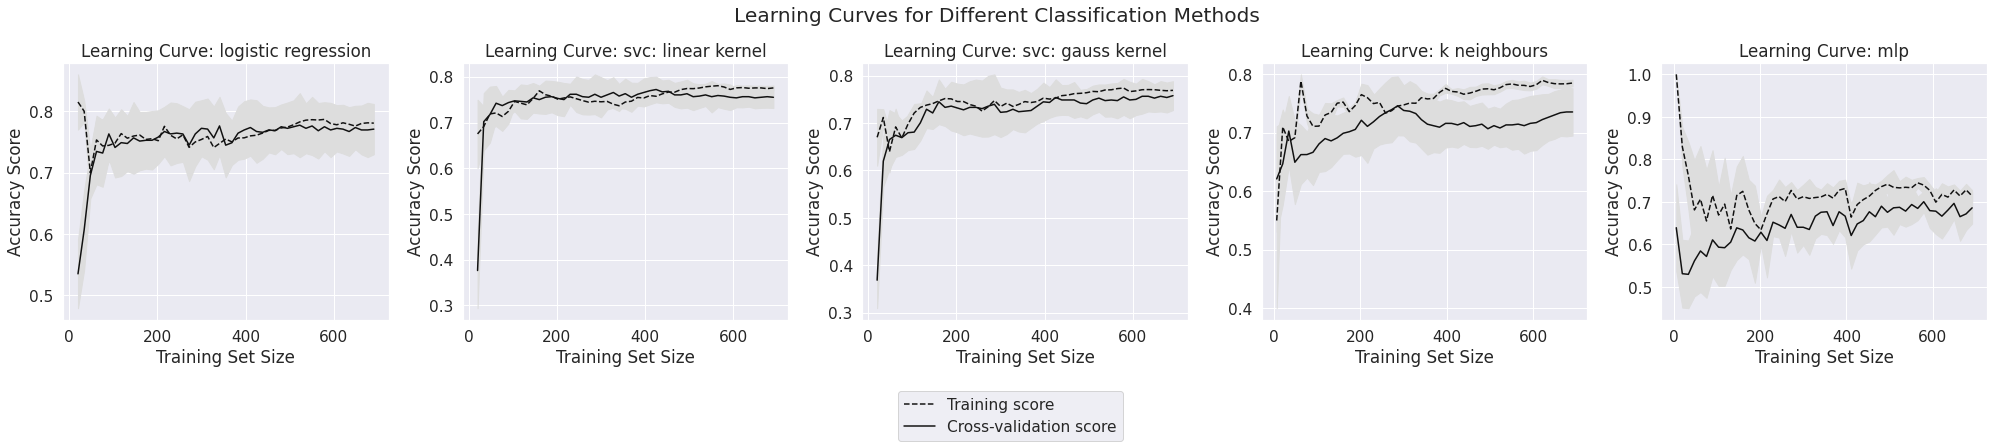

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(28,5))
plt.suptitle('Learning Curves for Different Classification Methods', y=1.05)
plt.subplots_adjust(wspace=0.3)
for i, method in enumerate(methods):
  learning_curve_plot(i, method)
plt.legend(['Training score', 'Cross-validation score'],loc='lower center',bbox_to_anchor=(-2, -0.5))
plt.show()

Логистическая регрессия и модели на основе метода опорных векторов (с линейным ядром и с гауссовым ядром хорошо обучены, так как кривые смыкаются и находятся близко друг к другу, а функция ошибки является достаточно стабильной. Метод k ближайших соседей и метод многослойного прецептрона недообучены, так как кривые сильно расходятся и в принципе показывают весьма нестабильную динамику.

## Ирис

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
data = pd.DataFrame(data= np.c_[load_iris()['data'], load_iris()['target']],
                     columns= load_iris()['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
X = data.drop(['target'], axis=1)
Y = data.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

In [ ]:
methods = {'logistic regression': LogisticRegression(),
           'svc: linear kernel': svm.SVC(kernel='poly') ,
           'svc: gauss kernel': svm.SVC(kernel='rbf') ,
           'k neighbours': KNeighborsClassifier(n_neighbors=6),
           'mlp': MLPClassifier(solver='adam')
           }

In [ ]:
def classifier(method):
  model = methods[method]
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  methods_score[str(method)] = [metrics.accuracy_score(Y_test, Y_pred),
                                metrics.precision_score(Y_test, Y_pred, average='weighted'), 
                                metrics.recall_score(Y_test, Y_pred, average='weighted')]

In [ ]:
methods_score = dict()
for method_name in methods.keys():
  classifier(method_name)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
methods_score = pd.DataFrame(methods_score.values(),
                             columns = ['accuracy','precision','recall'],
                             index = methods_score.keys())

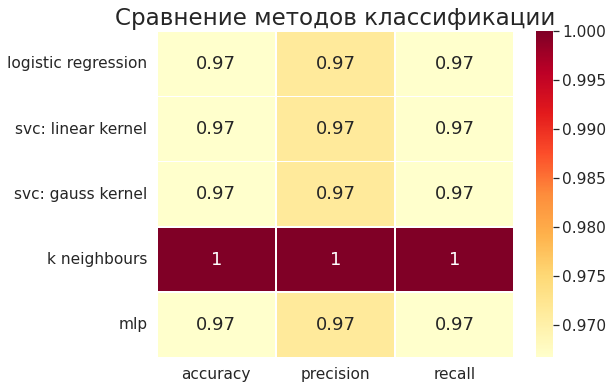

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
plt.title('Сравнение методов классификации', fontsize = 23)


sns.heatmap(methods_score, linewidths=.5, annot=True, annot_kws={'fontsize':18}, cmap=cmaps[72])

Лучше всего с предсказанием вида ириса справляется метод k ближайших соседей. Он даёт нам сто процентные показатели по всем рассматриваемым метрикам. Посмотрим отдельно матрицу классификации для этого метода

In [ ]:
model = methods['k neighbours']
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

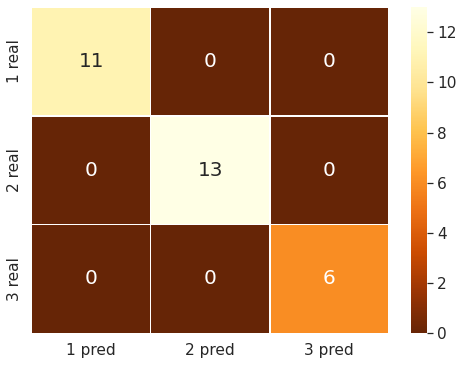

In [ ]:
fig = plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
cm = metrics.confusion_matrix(Y_test, Y_pred)

sns.heatmap(cm, linewidths=.5, annot=True, annot_kws={'fontsize':20},cmap=np.random.choice(cmaps),
            xticklabels=['1 pred','2 pred', '3 pred'],
            yticklabels=['1 real','2 real', '3 real'])